In [1]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Contains 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes, which have the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


Each row is a separate image.

Column 1 is the class label.

Remaining columns are pixel numbers (784 total).

Each value is the darkness of the pixel (1 to 255).

The input dimension is very high, as we can observe, so we can speed up the computations by using PCA.

In [3]:
print(trainX.shape, trainY.shape)

(60000, 28, 28) (60000,)


In [4]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]
# and the corresponding label numbers
labelNumbers = [0,1,2,3,4,5,6,7,8,9]

In [5]:
# create a dictionary where each number corresponds to its real name
labels = {key:value for key, value in zip(labelNumbers, labelNames)}

In [6]:
print(labels)

{0: 'top', 1: 'trouser', 2: 'pullover', 3: 'dress', 4: 'coat', 5: 'sandal', 6: 'shirt', 7: 'sneaker', 8: 'bag', 9: 'ankle boot'}


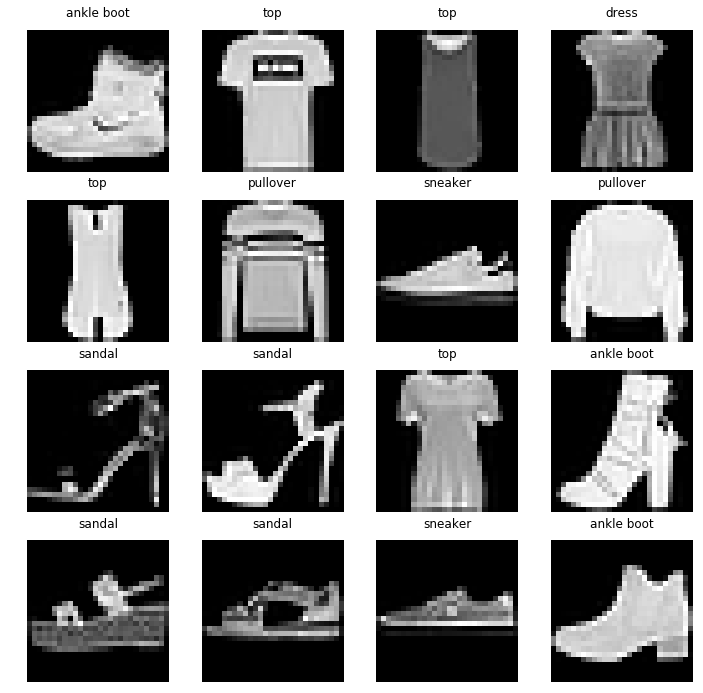

In [7]:
fig, axs = plt.subplots(4,4, figsize = (12, 12))

for i, ax in enumerate(axs.flat):
    plt.gray() 
    ax.matshow(trainX[i]) 
    ax.axis('off')
    ax.set_title(labels[trainY[i]])
plt.show() 

In [8]:
#'flatten' the images
trainX = trainX.reshape((trainX.shape[0], 28*28))
testX = testX.reshape((testX.shape[0], 28*28))

In [9]:
#PCA is effected by scale so we need to normalize the features in our data
# features are contained in the trainX and testX datasets.
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [10]:
print(trainX.shape)
print(testX.shape)

(60000, 784)
(10000, 784)


PCA is using the correlation between some dimensions and tries to provide a minimum number of variables 
that keeps the maximum amount of variation or information about how the original data is distributed.

In [11]:
# Choose how many features you want to keep
# PCA will select the principal ones
components = 200

In [12]:
from sklearn.decomposition import PCA
# call the model
pca = PCA(n_components = components)
# fit PCA on the training set
pca_result = pca.fit(trainX)
# Apply the mapping (transform) to both the training set and the test set.
trainX = pca.transform(trainX)
testX = pca.transform(testX)

In [13]:
# We can visualize in a 3d plot how much each of the 10 classes is separated from another when we perform PCA-3
# this way, we will know how much information (regarding classification) we keep after PCA
# the more distinct the clusters are (one color per cluster), the more distinct each class is

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
df = pd.DataFrame(columns=['one', 'two', 'three', 'y'])
if components == 3:
    df['one'] = trainX[:,0]
    df['two'] = trainX[:,1] 
    df['three'] = trainX[:,2]
    df['y'] = trainY
 
    
    fig = plt.figure(figsize=(16,10))
    ax = plt.axes(projection="3d")

    z_points = df['one']
    x_points = df['two']
    y_points = df['three'] 
    lab=df['y']
    
    ax.set_xlabel('one')
    ax.set_ylabel('two')
    ax.set_zlabel('three')
    
    ax.set_title('PCA-3 plot')
    p = ax.scatter3D(x_points, y_points, z_points, c = lab, cmap='tab10')
    
    fig.colorbar(p)
    
    plt.show()


In [14]:
# how much of the variation in the total dataset the chosen principal components actually account for
variation = pca.explained_variance_ratio_
print('Variation per principal component: {} \n'.format(variation))

Variation per principal component: [0.2903944  0.1775546  0.06019268 0.04957457 0.03847683 0.03460795
 0.02341711 0.01905428 0.01349855 0.01314278 0.00992883 0.00913263
 0.00765799 0.00659711 0.00607855 0.00589826 0.00551938 0.00524504
 0.00458082 0.00455519 0.00433687 0.00407101 0.00384761 0.00372555
 0.0036111  0.00350659 0.00333244 0.00319362 0.00308065 0.00293275
 0.00275605 0.00265064 0.00263705 0.00255837 0.00246214 0.00235902
 0.0023029  0.00225522 0.00218477 0.00209325 0.00200281 0.00195735
 0.00194689 0.00182782 0.00175351 0.00171922 0.00168785 0.00163964
 0.00160898 0.00154833 0.00152275 0.0015002  0.00146767 0.0014327
 0.00138216 0.00136935 0.00131121 0.00128802 0.00127192 0.00125813
 0.00121374 0.00120117 0.00118066 0.00116162 0.00115516 0.00112117
 0.00110967 0.00109532 0.00104746 0.00104554 0.00102808 0.00100579
 0.00097595 0.00095367 0.00093544 0.00092895 0.00092226 0.00089809
 0.00088746 0.00086361 0.00084441 0.00083394 0.00081063 0.00080474
 0.00079102 0.00078785 0.000

In [15]:
total_var = sum(variation)

In [16]:
print(total_var*100,'%')

91.19298095465638 %


We will run a few experiments to see how much variation in total is maintained after running PCA.

components = 3  total var = 52.8141763061285 %

components = 10  total var = 71.99138924479485 %

components = 50  total var = 86.26635307446122 %

components = 100  total var = 91.18544959346764 %

components = 200  total var = 95.31678915664088 %

components = 300  total var = 97.32652505190345 %

components = 400  total var = 98.50508385352441 %

components = 500  total var = 99.24555434845388 %

In [17]:
# We are going to keep only 1000 samples from our initial data. So, we need to concatenate train and test sets:
# trainX and testX in one array, trainY and testY in another
# axis = 0, so that testX will be added as new rows of trainX

X = np.concatenate((trainX, testX), axis=0)

In [18]:
print(X.shape)

(70000, 100)


In [19]:
Y = np.concatenate((trainY, testY), axis=0)

In [20]:
print(Y.shape)

(70000,)


In [21]:
# We need to shuffle X and Y data, but without loosing the connection between images (X) and labels(Y)!!
# 1st step: arrays->lists
X_list = list(X)

In [22]:
Y_list = list(Y)

In [23]:
# 2nd step: zip together the lists of Xs and Ys, so the pairs are maintained
new_list = list(zip(X_list, Y_list))

In [24]:
# 3rd step: random shuffle
import random
random.shuffle(new_list)

In [25]:
# 4th step: unzip
X_list, Y_list = zip(*new_list)

In [26]:
# 5th step-> list to array again
X = np.asarray(X_list, dtype=np.float32)

In [27]:
Y = np.asarray(Y_list, dtype=np.float32)

In [28]:
print(X.shape, Y.shape)

(70000, 100) (70000,)


In [29]:
# keep 1000 samples
X, Y = X[:1000], Y[:1000]

In [30]:
print(X.shape[0])

1000


In [31]:
# 60% train - 40% test
train_size = 0.6

#X.shape[0] indicates the number of data, so split_data gives us the number of data training set will contain
# depending on the train size we choose
split_data = int(train_size*(X.shape[0]))

In [32]:
print(split_data)

600


In [33]:
Xtrain, Xtest = X[:split_data], X[split_data:]

In [34]:
Ytrain, Ytest = Y[:split_data], Y[split_data:]

In [35]:
# check that everything is ok!
print(Xtrain.shape, Xtest.shape, '\n')
print(Ytrain.shape, Ytest.shape, '\n')

(600, 100) (400, 100) 

(600,) (400,) 



In [36]:
# Logistic regression is a kind of slow process
# We can measure the improvement that PCA may offer, by timing how much time training will need in different cases
import time

In [37]:
# We will apply logistic regression on the transformed data
from sklearn.linear_model import LogisticRegression

In [38]:
# create an instance of the model
# increase the number of iterations ftom 100 to 1000 to be able to run more complex models, as the convergence is slow
logisticRegr = LogisticRegression(max_iter = 1000, multi_class = 'multinomial')

In [39]:
# measure how long training lasts
start = time.time()
logisticRegr.fit(trainX, trainY)
end = time.time()
elapsed_time = end - start
print('Elapsed time:', elapsed_time)

Elapsed time: 94.97541379928589


C:\Users\anna\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
# Predict the labels of new data
pred = logisticRegr.predict(testX[0:10])
print(pred)
# We can also print the real labels from the test set labels (testY)
print(testY[0:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [41]:
accuracy = logisticRegr.score(testX, testY)

In [42]:
print('Accuracy:',accuracy*100,'%')

Accuracy: 83.93 %


components = 3, Elapsed time: 17.961496353149414, Accuracy: 60.309999999999995 %

components = 10, Elapsed time: 33.625617027282715, Accuracy: 75.56 %

components = 50, Elapsed time: 62.12146997451782, Accuracy: 82.86 %

components = 100: crashes because number of iterations has exceeded the limit before converging to a solution. We can try to increase it, but it is going to take a lot of time in total. Therefore, we need to consider with which number of PCA components
(and which variance) we are fine, as there is going to be a tradeoff between time and PCA variance. 
In practical terms, if we wish to reconstruct the image dataset from the PCA-transformed data, we are going to evaluate how 
much information loss we can tolerate, i.e. how many PCA components are enough to give us back an accurate reconstruction.
In this case, we are going to evaluate if it is worth it to increase the number of iterations for logistical regression.